In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
df = pd.read_csv('dynamic_pricing.csv')
df.head(10)

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422
5,59,35,Urban,Silver,83,3.51,Night,Economy,128,339.955361
6,93,43,Suburban,Regular,44,4.41,Afternoon,Premium,16,104.061541
7,62,39,Rural,Gold,83,3.59,Afternoon,Premium,47,235.811864
8,79,14,Rural,Silver,71,3.74,Evening,Economy,128,501.412517
9,42,6,Rural,Silver,21,3.85,Night,Premium,128,398.993365


In [4]:
df.shape

(1000, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


In [8]:

# Describe the DataFrame
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


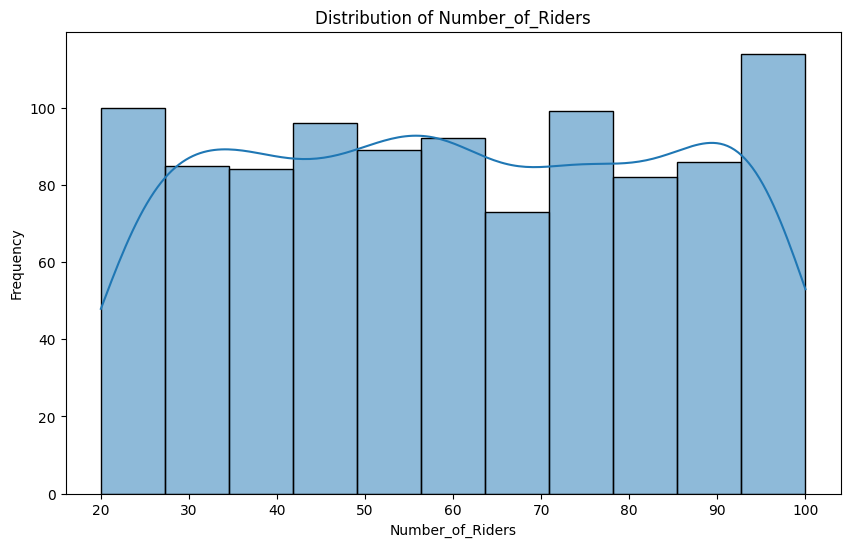

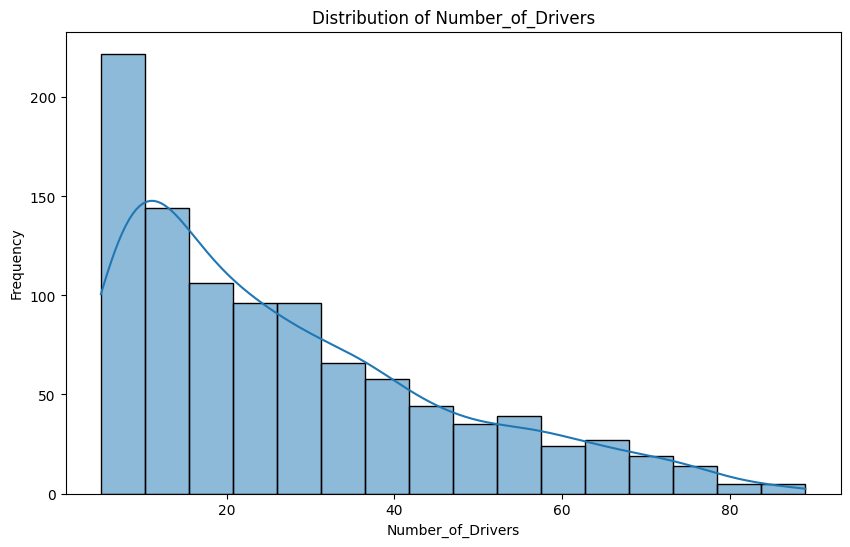

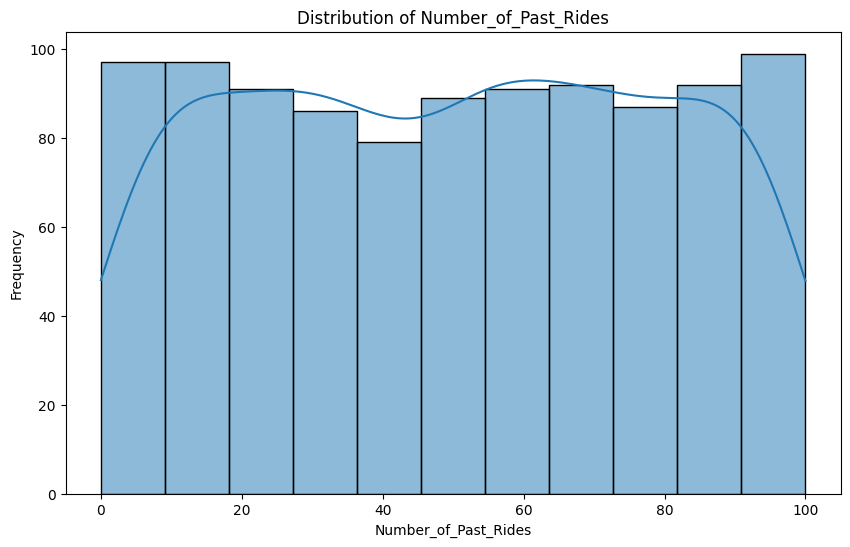

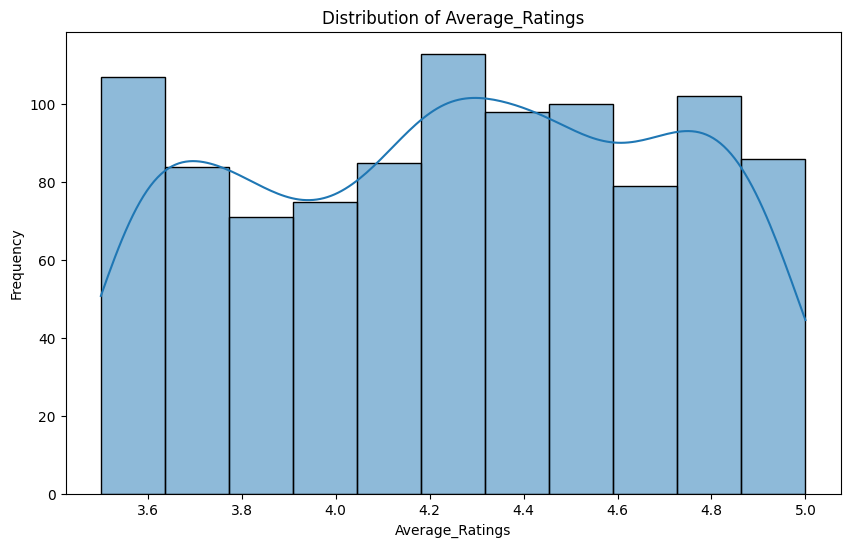

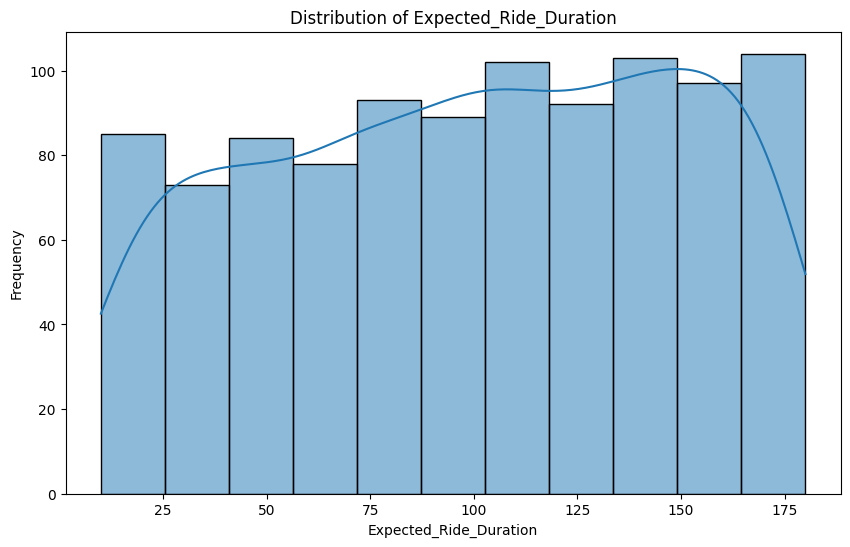

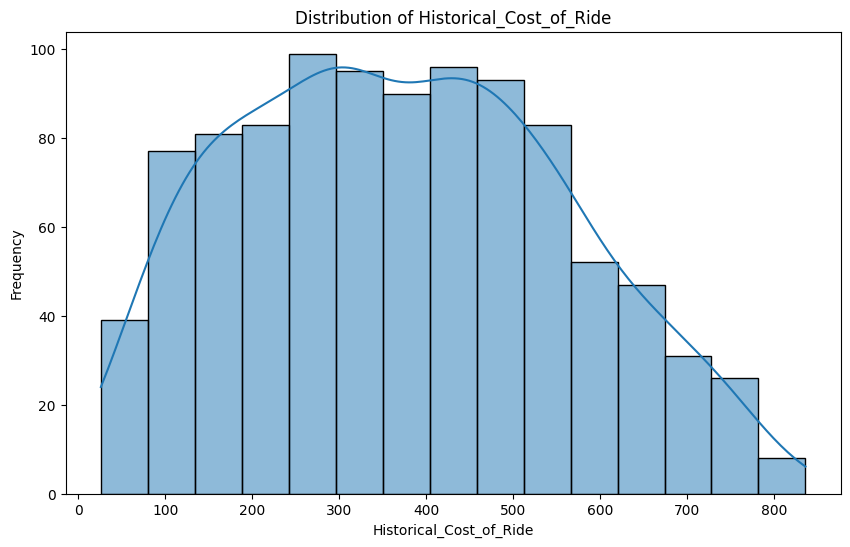

In [9]:


# Plot histograms for each numerical feature
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

## Numerical Features:
Summary Statistics: Provides mean, standard deviation, min, max, and quartiles for each numerical feature.
Histograms: Visualize the distribution of each numerical feature, showing the frequency of different ranges of values.


Value counts for Location_Category:
Location_Category
Urban       346
Rural       332
Suburban    322
Name: count, dtype: int64




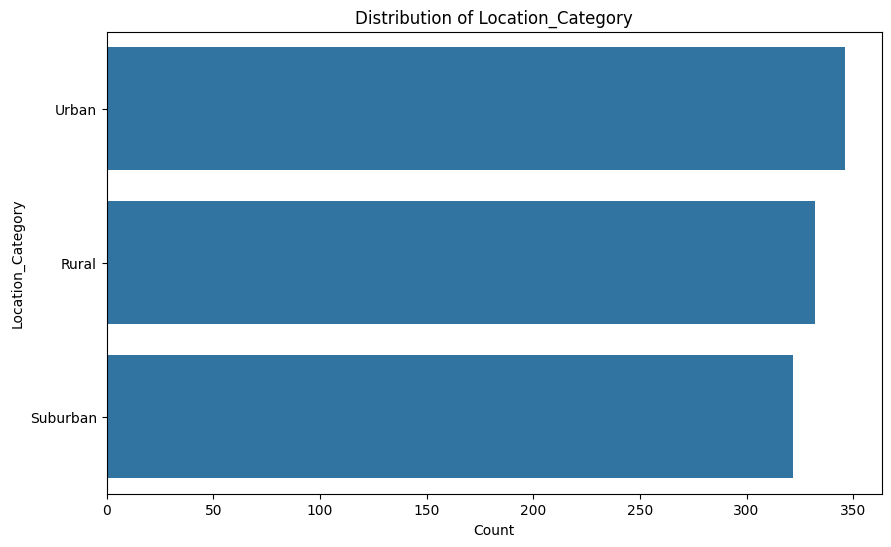

Value counts for Customer_Loyalty_Status:
Customer_Loyalty_Status
Silver     367
Regular    320
Gold       313
Name: count, dtype: int64




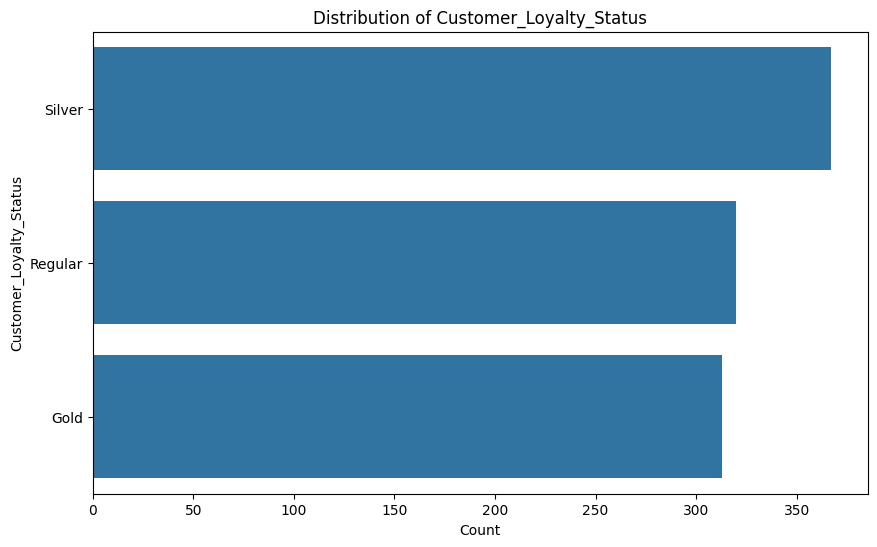

Value counts for Time_of_Booking:
Time_of_Booking
Night        276
Afternoon    247
Morning      246
Evening      231
Name: count, dtype: int64




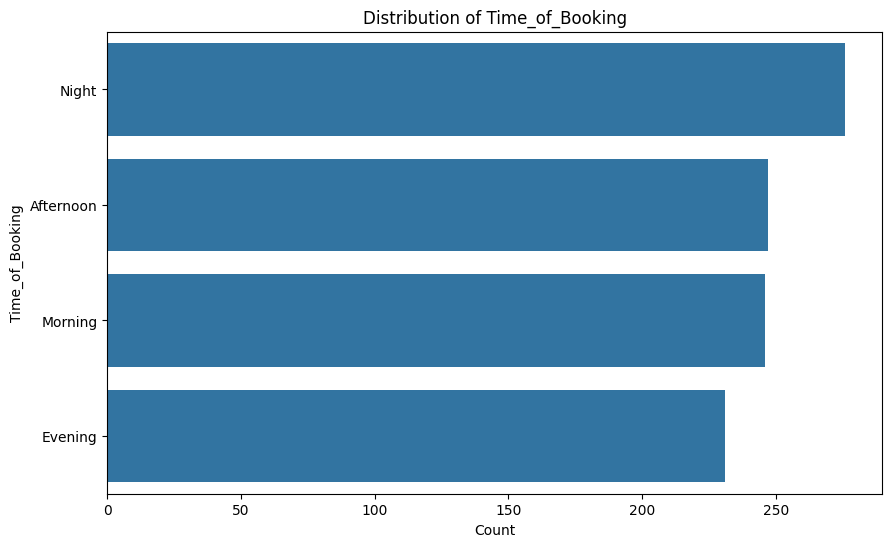

Value counts for Vehicle_Type:
Vehicle_Type
Premium    522
Economy    478
Name: count, dtype: int64




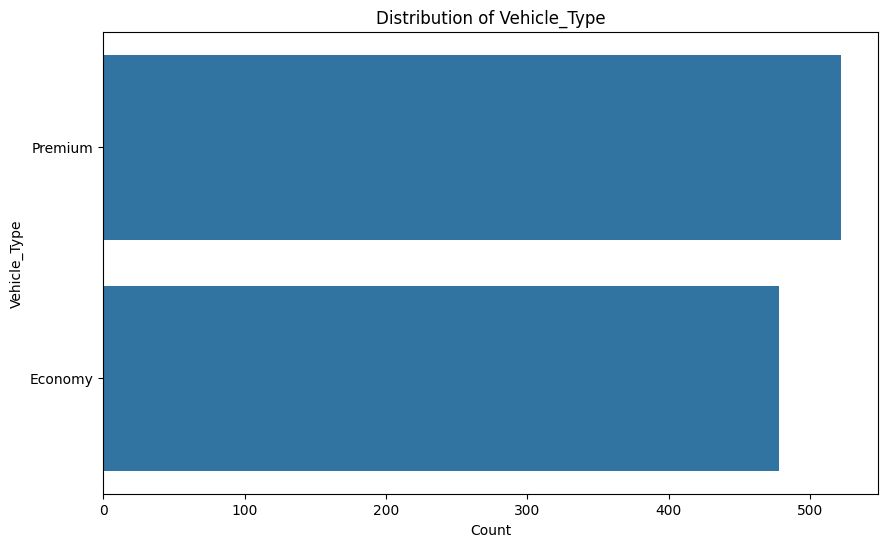

In [10]:

# Identify categorical features
categorical_features = df.select_dtypes(include=['object', 'category']).columns

# Explore the distribution of each categorical feature
for feature in categorical_features:
    # Display value counts
    print(f'Value counts for {feature}:')
    print(df[feature].value_counts())
    print('\n')
    
    # Plot bar chart
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[feature], order=df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)
    plt.show()

# Categorical Features:
### Value Counts: Displays the count of each unique value in the categorical features.
### Bar Charts: Visualize the distribution of each categorical feature, showing the frequency of each category.

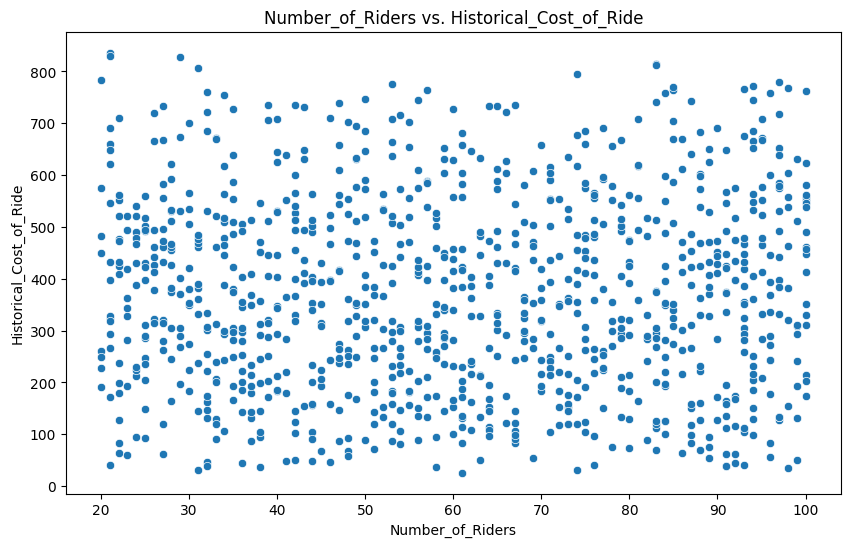

Correlation between Number_of_Riders and Historical_Cost_of_Ride: 0.005825700512009007



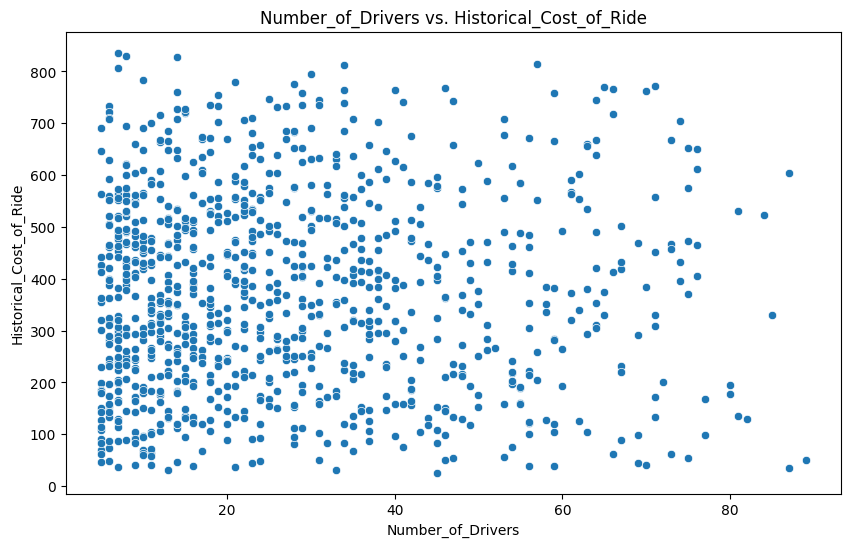

Correlation between Number_of_Drivers and Historical_Cost_of_Ride: 0.017081701145137265



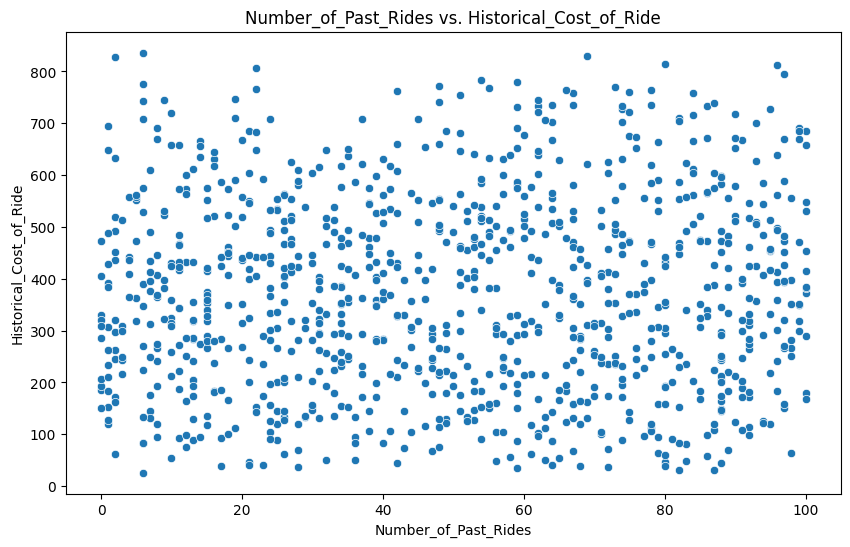

Correlation between Number_of_Past_Rides and Historical_Cost_of_Ride: 0.03585866432120546



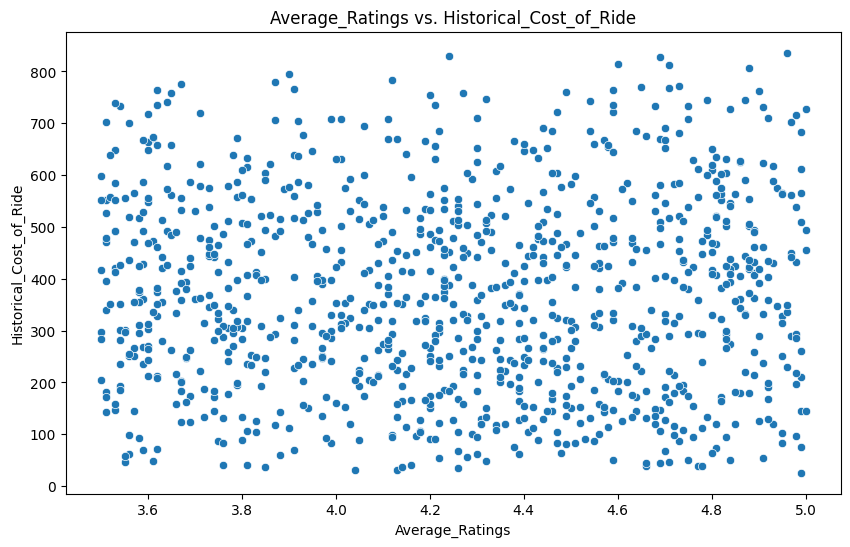

Correlation between Average_Ratings and Historical_Cost_of_Ride: -0.0010633418406516821



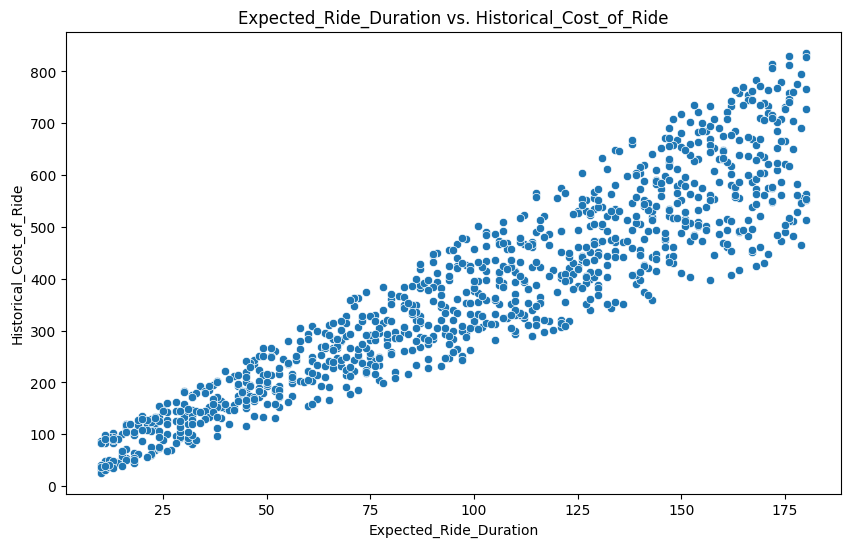

Correlation between Expected_Ride_Duration and Historical_Cost_of_Ride: 0.9275471833882495



In [11]:


# Define the target variable
target_variable = 'Historical_Cost_of_Ride'

# Numerical Features vs. Target Variable
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
numerical_features = numerical_features.drop(target_variable)

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[feature], y=df[target_variable])
    plt.title(f'{feature} vs. {target_variable}')
    plt.xlabel(feature)
    plt.ylabel(target_variable)
    plt.show()

    # Calculate and display correlation coefficient
    correlation = df[feature].corr(df[target_variable])
    print(f'Correlation between {feature} and {target_variable}: {correlation}\n')



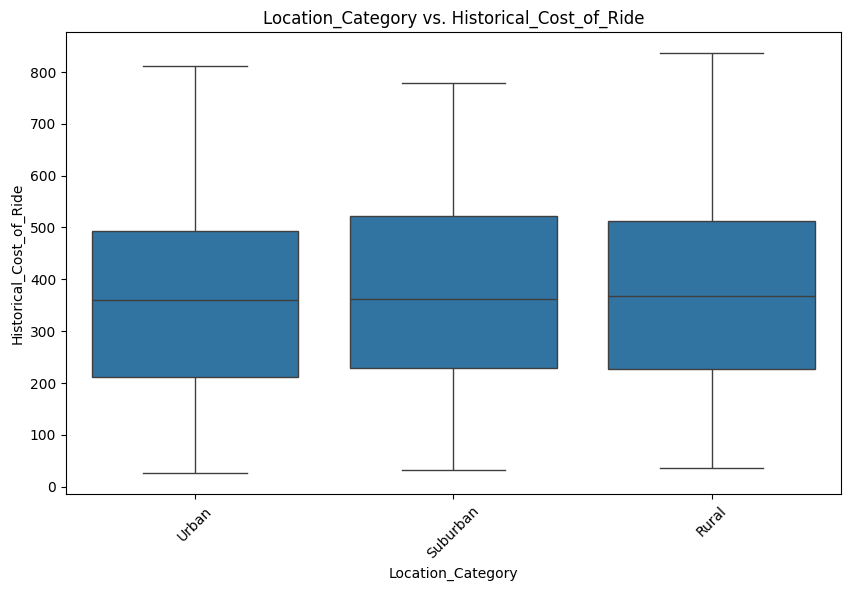

Mean Historical_Cost_of_Ride by Location_Category:
Location_Category
Rural       379.942172
Suburban    374.319486
Urban       363.673259
Name: Historical_Cost_of_Ride, dtype: float64




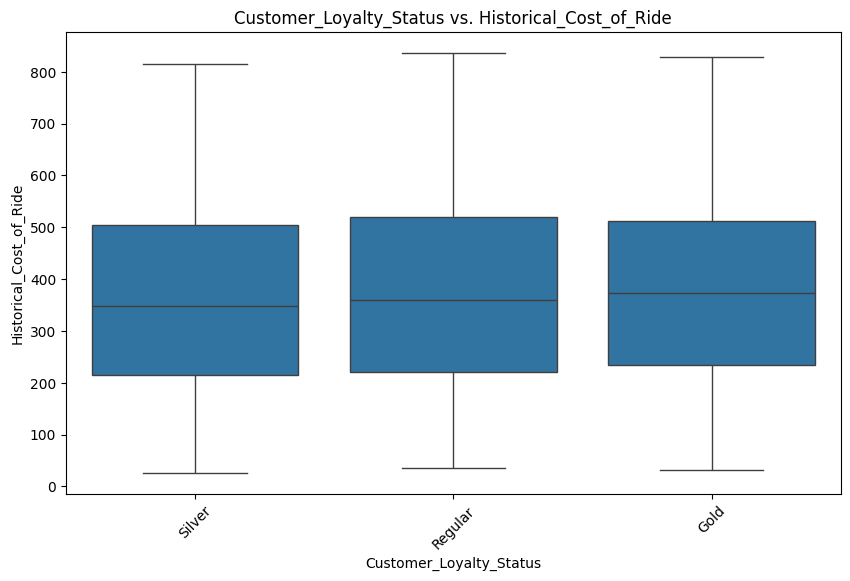

Mean Historical_Cost_of_Ride by Customer_Loyalty_Status:
Customer_Loyalty_Status
Gold       376.118746
Regular    380.125251
Silver     362.772140
Name: Historical_Cost_of_Ride, dtype: float64




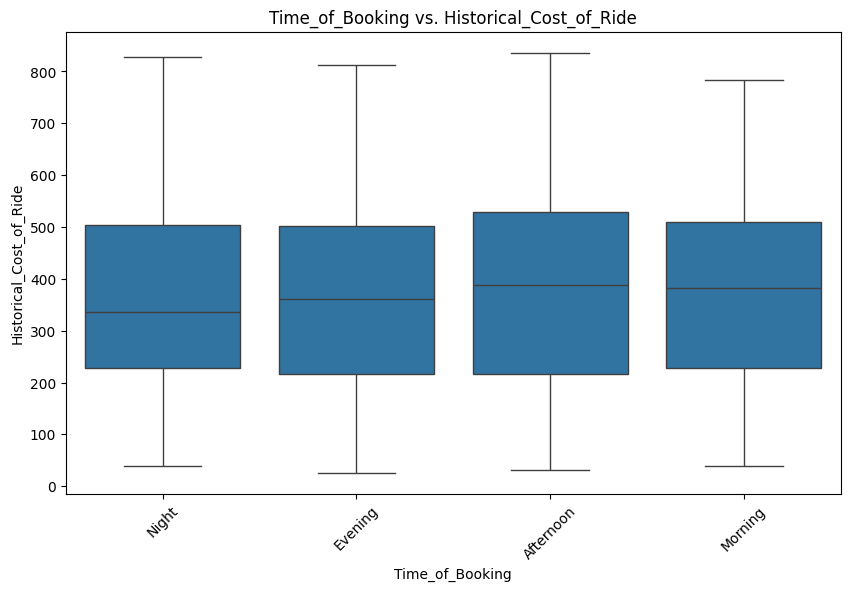

Mean Historical_Cost_of_Ride by Time_of_Booking:
Time_of_Booking
Afternoon    380.818228
Evening      364.253957
Morning      378.062094
Night        367.009354
Name: Historical_Cost_of_Ride, dtype: float64




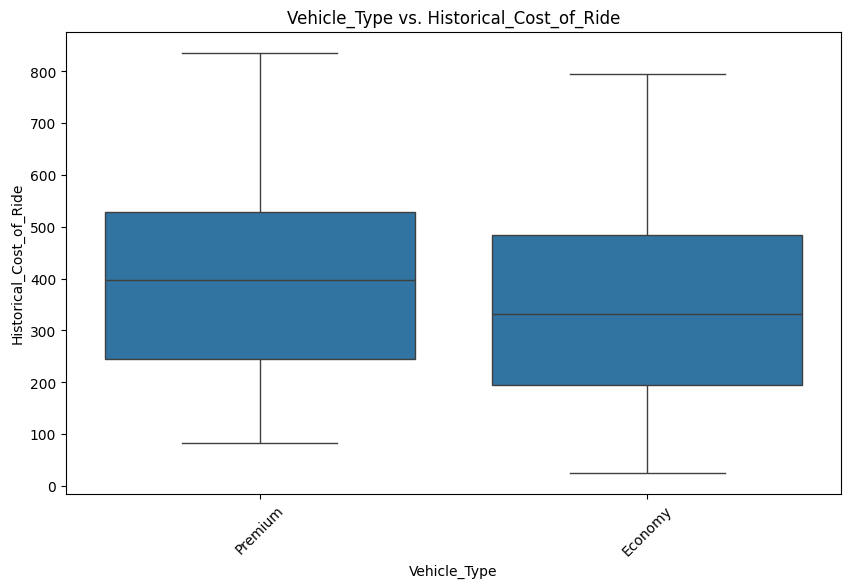

Mean Historical_Cost_of_Ride by Vehicle_Type:
Vehicle_Type
Economy    346.573399
Premium    396.246242
Name: Historical_Cost_of_Ride, dtype: float64




In [12]:

# Define the target variable
target_variable = 'Historical_Cost_of_Ride'

# Categorical Features vs. Target Variable
categorical_features = df.select_dtypes(include=['object', 'category']).columns

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature], y=df[target_variable])
    plt.title(f'{feature} vs. {target_variable}')
    plt.xlabel(feature)
    plt.ylabel(target_variable)
    plt.xticks(rotation=45)
    plt.show()

    # Calculate and display groupby mean
    groupby_mean = df.groupby(feature)[target_variable].mean()
    print(f'Mean {target_variable} by {feature}:')
    print(groupby_mean)
    print('\n')